# Capstone Project

TMDB Dataset found at:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

This Dataset from The Movie Database contains information on almost 5,000 films from 1916 to 2017.  Features include numeric variables like budget and revenue, as well as categorical variables like genre and language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
movies = pd.read_csv('~/Desktop/Data_Science/tmdb/tmdb_5000_movies.csv')

In [3]:
movies.shape

(4803, 20)

4803 films are listed with information in 12 columns.  First, we'll remove some columns beyond the scope of this project to focus on some elements.

In [4]:
#Remove some columns beyond the scope of this project
movies = movies.drop(['homepage', 'id', 'overview', 'original_title', 'keywords', 'production_companies', 'production_countries', 'tagline'], axis=1)
movies.head()

,budget,genres,original_language,popularity,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


In [5]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Now we can focus on some select columns.  The financial aspects of these films are conveyed by looking at budget and revenue.  Genre will be used to establish some simple descriptions of the films.  When combined with release date, we can look at this information over time.

### Release Year
To make more concise use of the release date, we'll extract the year.  Then we can explore films by release year.

In [6]:
#create method to extract year from release date
def ExtractYear(val):
    tokens = val.split('-')
    return tokens[0]

#streamline release date data to string
movies['release_date'] = movies['release_date'].astype(str)

#apply year extraction method to release date
movies['release_year'] = movies['release_date'].apply(ExtractYear)

#turn release year data into numbers
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='integer')

In [7]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989,2002.468763
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,12.414354
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


The earliest record is from 1916, with very few films from 1916 through the 5th quantile, so we'll leave those out.

In [8]:
movies = movies[movies['release_year'] > movies['release_year'].quantile(0.05)]

In [44]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.550000e+03,4550.000000,4.550000e+03,4548.000000,4550.000000,4550.000000,4550.000000
mean,3.036340e+07,21.680558,8.453674e+07,106.155233,6.049802,704.043077,2004.621319
std,4.138421e+07,32.222683,1.658643e+08,21.734581,1.193490,1252.162604,8.003167
min,0.000000e+00,0.001186,0.000000e+00,0.000000,0.000000,0.000000,1980.000000
25%,8.700000e+05,4.808317,0.000000e+00,93.000000,5.600000,55.000000,2000.000000
50%,1.500000e+07,13.247682,1.984224e+07,103.000000,6.200000,242.000000,2006.000000
75%,4.000000e+07,28.562784,9.605755e+07,117.000000,6.800000,755.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


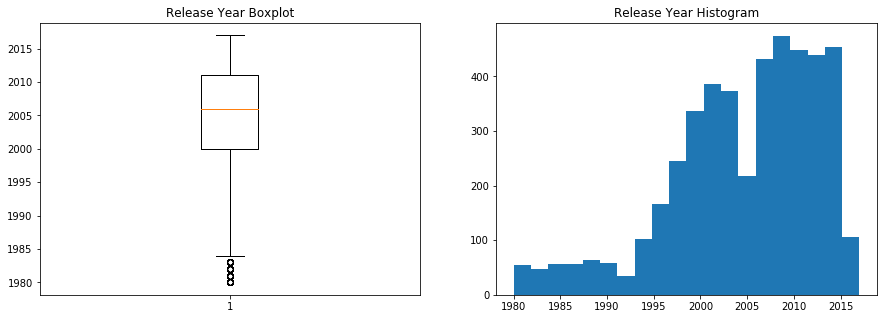

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(movies['release_year'].dropna(how = 'any'))
plt.title('Release Year Boxplot')

plt.subplot(1, 2, 2)
plt.hist(movies['release_year'].dropna(how = 'any'), bins=20)
plt.title('Release Year Histogram')

plt.show()

Now we are better able to see our release year data by starting with information from 1980.  We can see an increase in film listings from the mid-1990s to early 2000s, then a fairly steady number from there (less a momentary dip in the mid-2000s)

### Budget

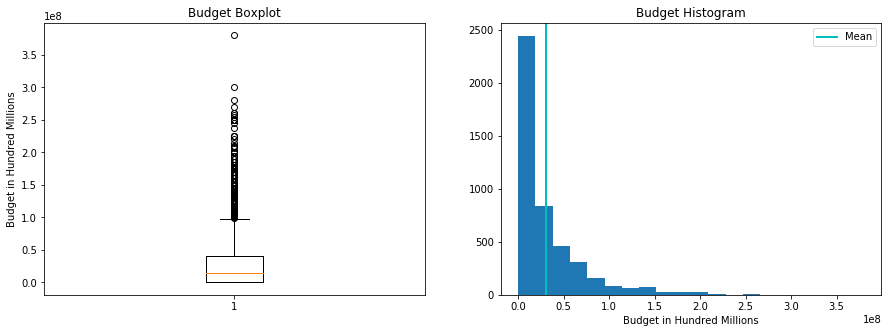

Budget Mean:  30363396.80043956


In [38]:
#budget

budget = movies['budget']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(budget)
plt.title('Budget Boxplot')
plt.ylabel('Budget in Hundred Millions')

plt.subplot(1, 2, 2)
plt.hist(budget, bins=20)
plt.title('Budget Histogram')
plt.axvline(budget.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xlabel('Budget in Hundred Millions')
plt.legend(loc='upper right') 

plt.show()
print('Budget Mean: ', budget.mean())

We can see that the budget is heavily skewed to the right, with a much larger number of films with budgets well less than the mean of $30 million (nearly 75%).

### Revenue

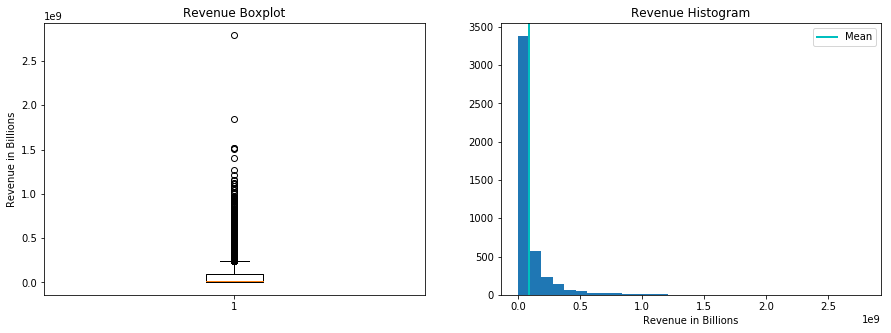

Revenue Mean:  84536737.40813187


In [43]:
#revenue

revenue = movies['revenue']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(revenue)
plt.title('Revenue Boxplot')
plt.ylabel('Revenue in Billions')

plt.subplot(1, 2, 2)
plt.hist(revenue, bins=30)
plt.title('Revenue Histogram')
plt.axvline(revenue.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right') 
plt.xlabel('Revenue in Billions')

plt.show()
print('Revenue Mean: ', revenue.mean())

Like budget, the revenue data is also right skewed.  Here we see most films again fall below the mean of $84.5 million (again almost 75%).

Text(0.5,1,'Average Budgets by Release Year')

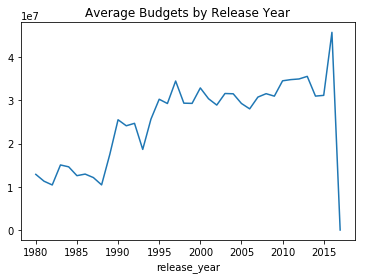

In [34]:
movies.groupby(['release_year']).mean()['budget'].plot()
plt.title('Average Budgets by Release Year')